# KNN Regressor

## Loading training and testing data

In [1]:
#loading training data
train_data <- read.csv("Task1A_train.csv")
train_label <- train_data[1:nrow(train_data),2] #creating the training labels

#loading testing data
test_data <- read.csv("Task1A_test.csv")
test_label <- test_data[1:nrow(test_data),2] #creating the testing labels

In [2]:
#printing out first 5 rows of train data and labels
head(train_data)
head(train_label)

x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


[1] 0.71 0.85 0.61 0.92 0.72 0.92

In [3]:
#printing out first 5 rows of test data and labels
head(test_data)
head(test_label)

x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


[1] 0.63 0.44 0.69 0.55 0.77 0.60

In [4]:
#checking the dimensions of train and test datasets
dim(train_data)
dim(test_data)

[1] 42  2

[1] 42  2

## Implementation of average of the neighbours values function

This function calculates the average of the neighbours values and returns the calculated average value.

In [5]:
#function to calcuate the average of the neighbour's values
avg_neighbours <- function(x) {
    avg <- mean(x)
    return(avg)
}

## Implementation of KNN Regressor

This function knn_regressor takes 4 arguments train_data,train_label,test_data, and neighbourhood size (K). It returns the regressed values for the test data values. 

In [6]:
#KNN regressor function
knn_regressor <- function(train_data, train_label, test_data, K=3){
    
    train_len <- nrow(train_data) #length of train data
    test_len <- nrow(test_data) #length of test data
    
    #distance matrix which calculates the distance between data points
    dist <- as.matrix(dist(rbind(test_data, train_data), method= "euclidean"))[1:test_len, (test_len+1):(test_len+train_len)]
    
    regressed_vals <- c() #empty vector to store regressed values
    
    #iterating through the test data points
    for (i in 1:test_len){
        #finding the K nearest neighbours indices
        ind <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2] 
        
        d <- avg_neighbours(train_label[ind]) #calling the avg_distance function, argument as nearest training points
        regressed_vals <- c(regressed_vals, d) #storing the calcuated regressed value int he vector created
    }
    
   return(regressed_vals) #returns the regressed values

}

## Calculation of train and test errors for K = 1 to 20

First we calcuate the error difference between the regressed values and actual values, and square it. Then we take the mean of those squared errors for all the values. This is mean squared error and it has squared units. To maintain the same units as the quantity being estimated, we take the square root of the MSE, which becomes RMSE.

The chosen error function is root mean square error(RMSE). We calculate the train error and test error. 

In [17]:
#creating a data frame with K, train error and test error as columns. 
#Filling the data frame with zeros in train and test error columns
error <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))

#for K=1 to 20
for(i in 1:20){
    y_test <- knn_regressor(train_data, train_label, test_data, K=i) #storing the regressed test values
    y_train <- knn_regressor(train_data, train_label, train_data, K=i) #storing the regressed train values
    
    error[i, 'test'] <- sqrt(mean((test_label - y_test)^2)) #calculation of root mean square error for test data
    error[i, 'train'] <- sqrt(mean((train_label - y_train)^2)) #calculation of root mean square error for train data   
}

error #printing the error dataframe

K,train,test
1,0.0000000,0.3935945
2,0.1509632,0.4163139
3,0.2914464,0.4326166
4,0.3255072,0.4533746
5,0.3976324,0.3669469
6,0.4657130,0.4717088
7,0.6405341,0.4996022
8,0.7918818,0.4877006
9,0.9444320,0.5032273
10,1.0670213,0.5632805


## Loading required libraries

In [18]:
library(reshape) #used to restructure the data in dataframe
library(ggplot2) #used to plot graphs

Warning message:
"package 'reshape' was built under R version 3.4.4"

## Plotting RMSE vs 1/K

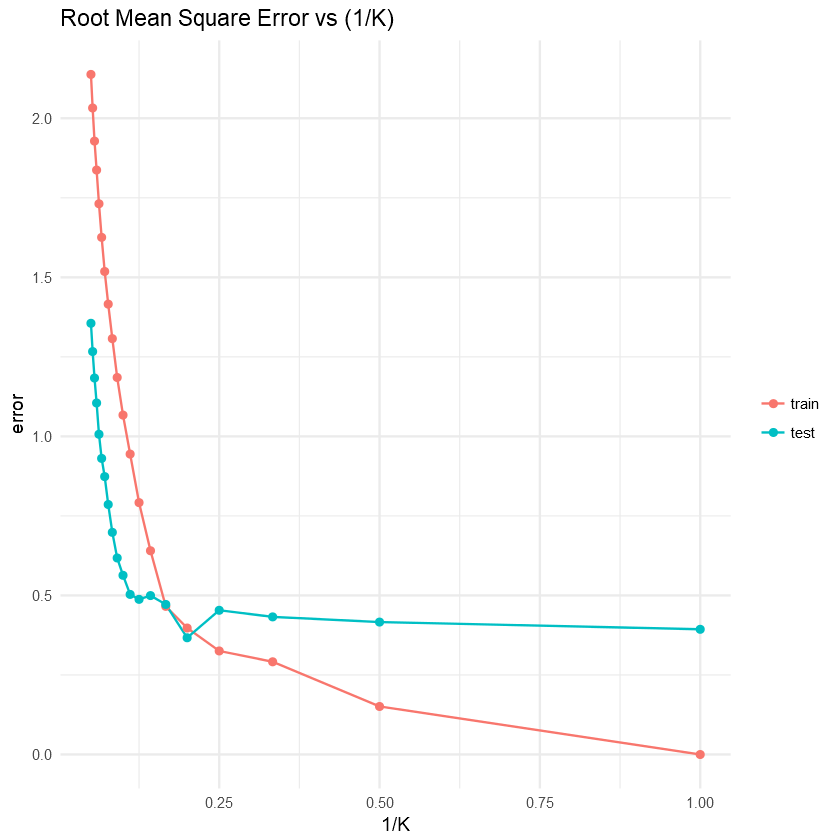

In [19]:
#reshaping the data frame
error_melt <- melt(error, id ='K')
names(error_melt) <- c('K','type','error') #assigning column names

#plotting RMSE vs 1/K
ggplot(data=error_melt, aes(x=1/K, y=error, color=type)) + geom_line() + geom_point() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Root Mean Square Error vs (1/K)")

## Insights

The optimum value of K is the one where test error is minimum. From the above plot, we can see that the test error (blue line) is minimum at the value 0.2 (1/K) approximately. We get the optimum value of k = 5.

Overfitting occurs when training error is zero, that is at K=1. So, for smaller values of K, overfitting occurs and as K increases, the model fits better and for higher K values, underfitting occurs as the train and test errors are high.

From the above plot, we can observe that at K=1 and 2, overfitting occurs, and between K =3 and K=5, the model fits better. For higher K values which are greater than 5, underfitting occurs as train and test errors are high.